# **Air Line Passanger Satisifcation** 🏦💴

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('dataset\Invistico_Airline.csv')

In [4]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.shape 

(129880, 22)

In [6]:
df_clean = pd.read_csv('df_clean.csv')

## **Univariate Analysis**

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1297 non-null   int64 
 1   satisfaction      1297 non-null   object
 2   Customer Type     1297 non-null   object
 3   Age               1297 non-null   int64 
 4   Type of Travel    1297 non-null   object
 5   Class             1297 non-null   object
 6   Flight Distance   1297 non-null   int64 
 7   Baggage handling  1297 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 81.2+ KB


all of them are numeric except for `contractcode`

In [8]:
numeric_desc = df_clean.describe().T
numeric_desc['nunique'] = [df_clean[col].nunique() for col in df_clean.select_dtypes(include='number').columns]
numeric_desc

,count,mean,std,min,25%,50%,75%,max,nunique
Unnamed: 0,1297.0,648.000000,374.555959,0.0,324.0,648.0,972.0,1296.0,1297
Age,1297.0,40.075559,15.182953,7.0,28.0,40.0,51.0,80.0,71
Flight Distance,1297.0,2003.020817,1067.684624,51.0,1354.0,1906.0,2560.0,6811.0,1083
Baggage handling,1297.0,3.728604,1.154189,1.0,3.0,4.0,5.0,5.0,5


In [9]:
df_clean.describe(include='object').T

,count,unique,top,freq
satisfaction,1297,2,satisfied,710
Customer Type,1297,2,Loyal Customer,1070
Type of Travel,1297,2,Business travel,899
Class,1297,3,Business,646


all of the contractcode is unique, let's drop this, because it won't effect overall EDA

## **Data Inconsistencies**

In [10]:
df_clean.isna().sum()

Unnamed: 0          0
satisfaction        0
Customer Type       0
Age                 0
Type of Travel      0
Class               0
Flight Distance     0
Baggage handling    0
dtype: int64

In [11]:
df_clean.duplicated().sum()

0

great no duplicates and null values

In [12]:
plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.titlesize'] = (20)
plt.rcParams['figure.titleweight'] = 'bold'

In [14]:
numeric_data = df_clean.select_dtypes(include='number')
object_data = df_clean.select_dtypes(include='object')

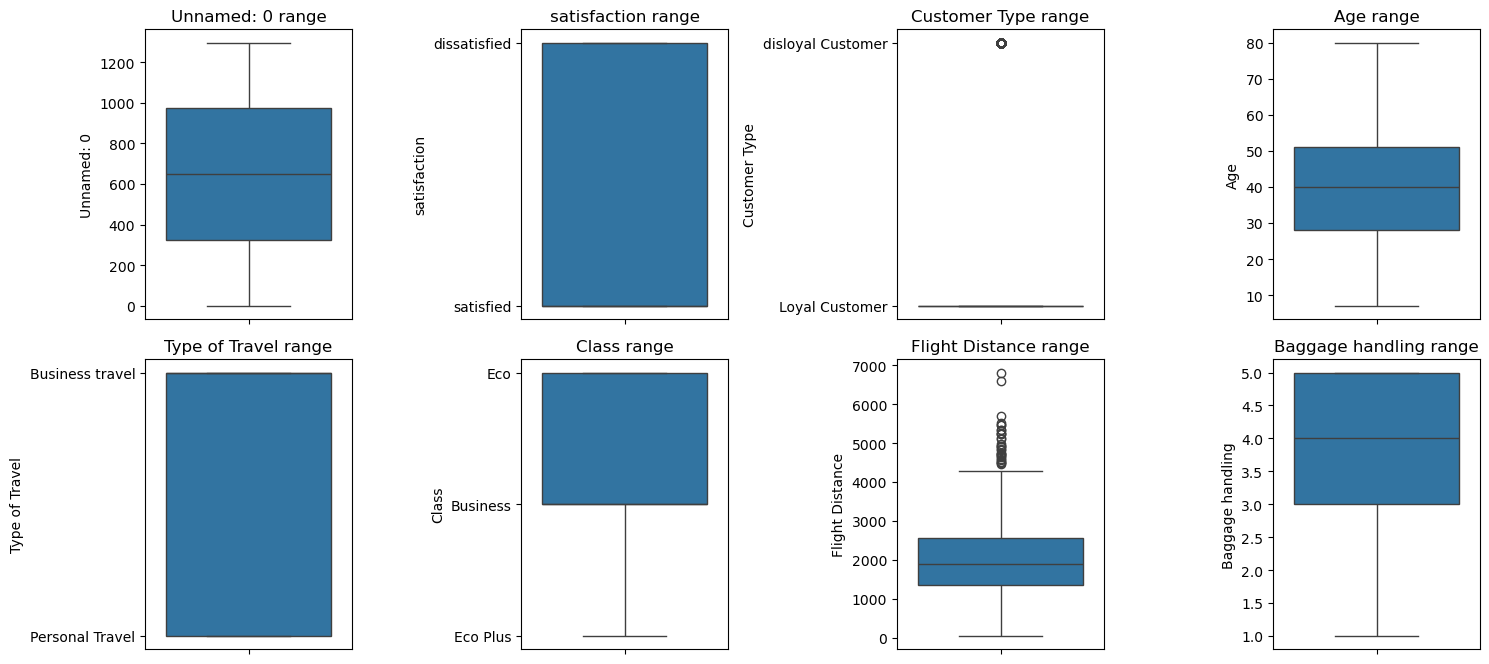

In [15]:
for i, col in enumerate(df_clean.columns):
    plt.subplot(3, 4, i+1)
    plt.title(f'{col} range')
    sns.boxplot(df_clean[col])
plt.tight_layout()
plt.show()

since asset has huge magnitude, some outliers appears, while `debt`, has more outliers than i thought

`"Hypotheses"`: those people who have `higher` debt than the rest, is risky to be borrowed money

In [16]:
def zscore(data):
    z = (data - data.mean()) / data.std()
    outliers = z[(z < -3) | (z > 3)]
    return outliers

for col in numeric_data.columns:
    outliers = zscore(numeric_data[col])
    print(f'{len(outliers)} in {col}')

0 in Unnamed: 0
0 in Age
11 in Flight Distance
0 in Baggage handling


were going to handle the extreme outliers only with zscores, so it won't effect the spliting

In [17]:
for col in numeric_data.columns:
    outliers = zscore(numeric_data[col])
    indices = outliers.index.tolist()
    df_clean.loc[indices, col] = df_clean[col].median()
    outliers = zscore(df_clean[col])
    print(f'After {len(outliers)} in {col}')

After 0 in Unnamed: 0
After 0 in Age
After 2 in Flight Distance
After 0 in Baggage handling


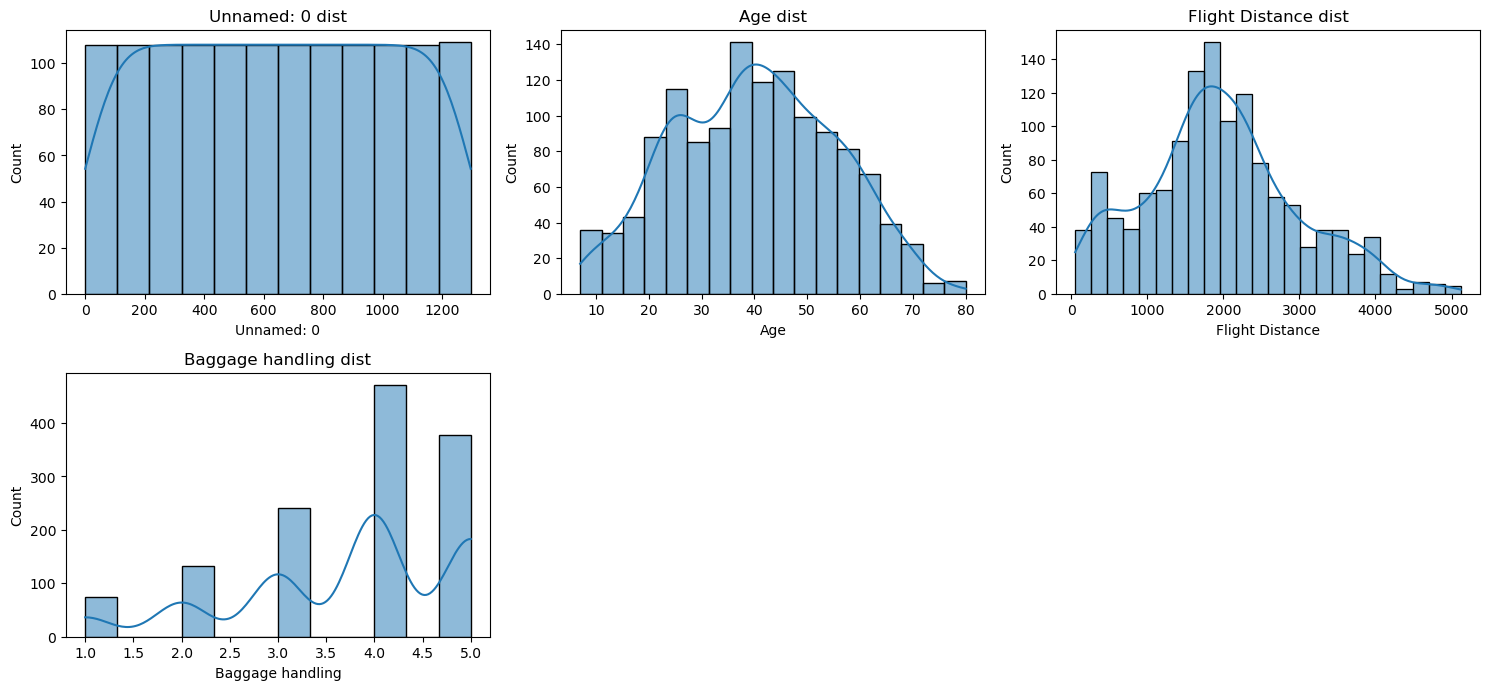

In [18]:
for i, col in enumerate(numeric_data.columns):
    plt.subplot(3, 3, i+1)
    plt.title(f'{col} dist')
    sns.histplot(df_clean[col], kde=True)
plt.tight_layout()
plt.show()

## **Bivariate Analysis**

## Early Hypotheses

| Early Hipotesa         | Reason                                      |
|---------------|--------------------------------------------------|
| Older People has more dependet, income and assets  | have more experience             |
| Lower assets or Income more risk        | longer time to return the money               |
| Have correlation to income and assets         | Some of people might buy more assets to inverst theoir money                        |
| Huge Debt / mideoverdue more risk    | if client to many borrow money with high overdue, it will risk                           |
| High depent more risk    | Client have a more responsibilites to handle              |


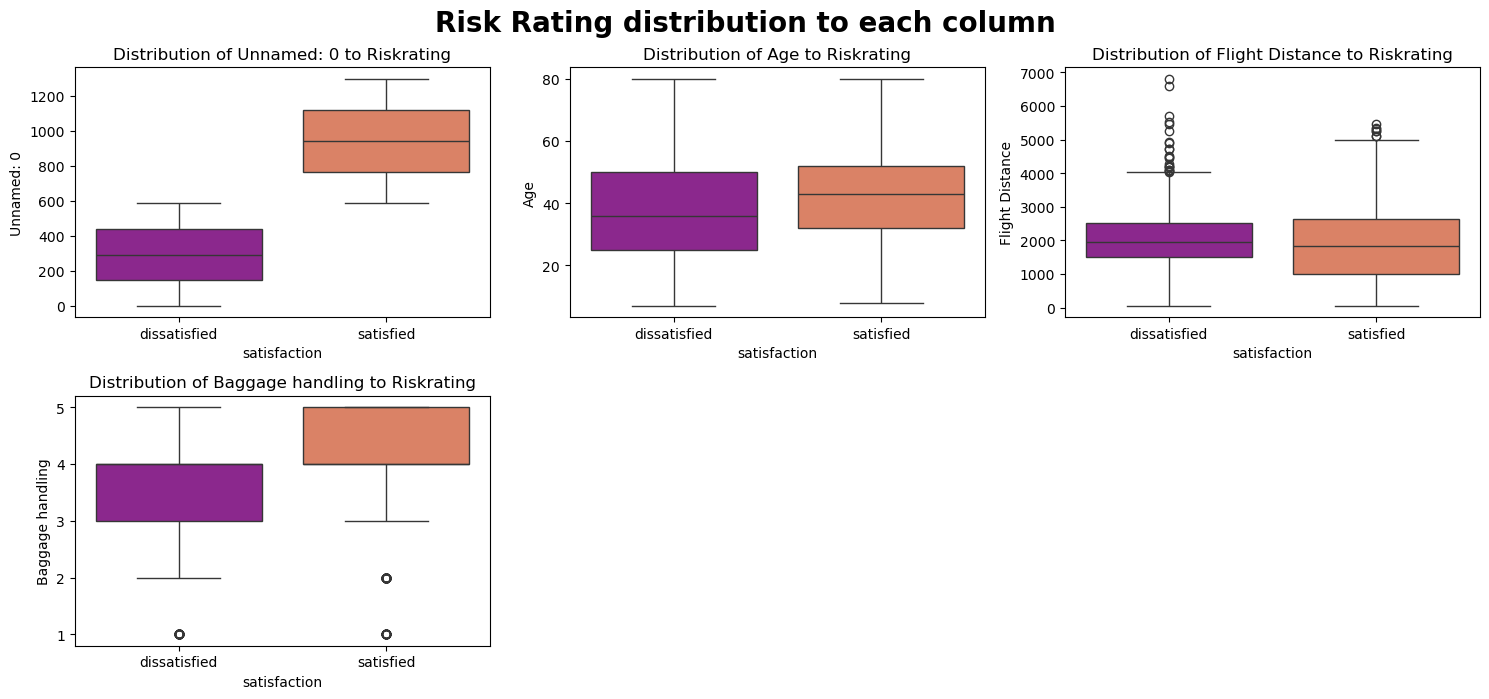

In [19]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.boxplot(numeric_data, x=df_clean['satisfaction'], y=col, hue=df_clean['satisfaction'], palette='plasma')
    plt.title(f'Distribution of {col} to Riskrating')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


### 1. Older People has more dependet, income and assets

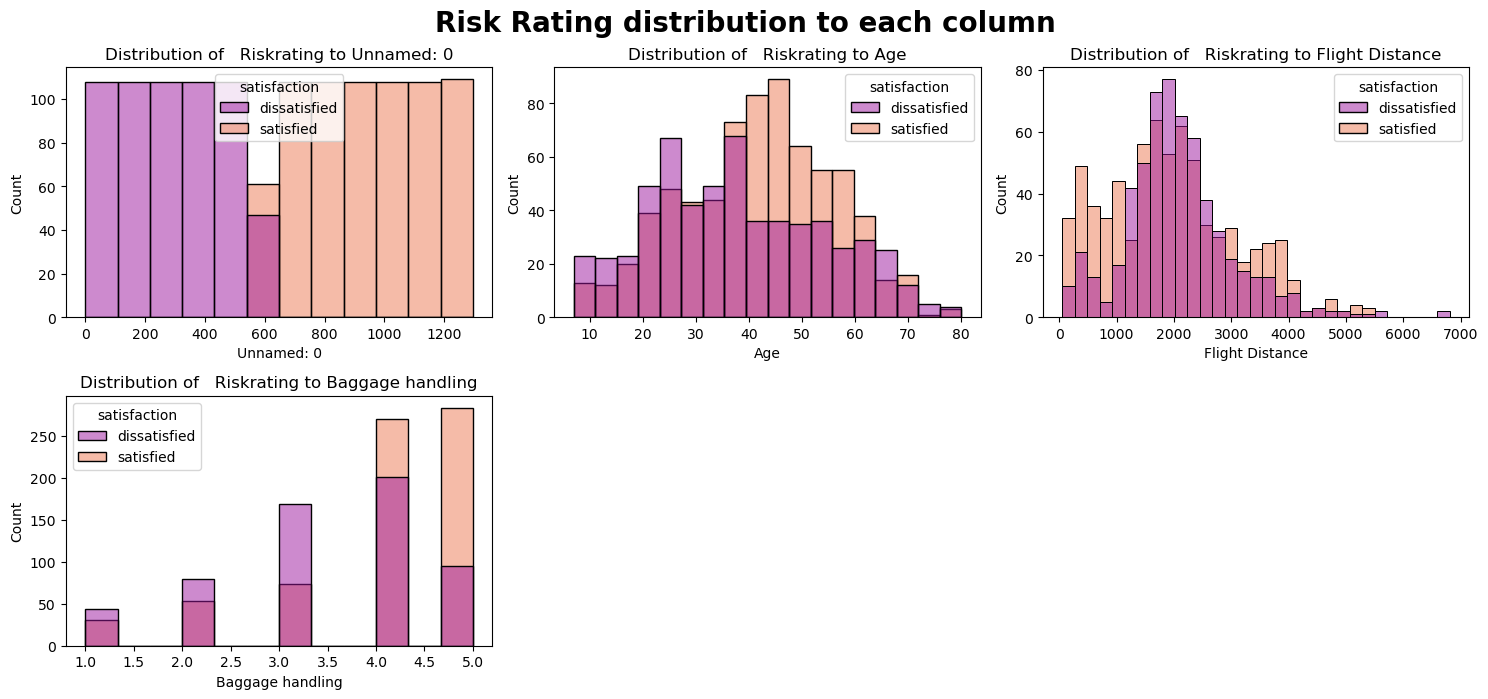

In [20]:
for i, col in enumerate(numeric_data):
    plt.subplot(3, 3, i+1)
    sns.histplot(numeric_data, x=col, hue=df_clean['satisfaction'], palette='plasma')
    plt.title(f'Distribution of   Riskrating to {col}')

plt.suptitle("Risk Rating distribution to each column")
plt.tight_layout()
plt.show()


In [21]:
object_data.columns

Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

<Axes: xlabel='satisfaction', ylabel='Customer Type'>

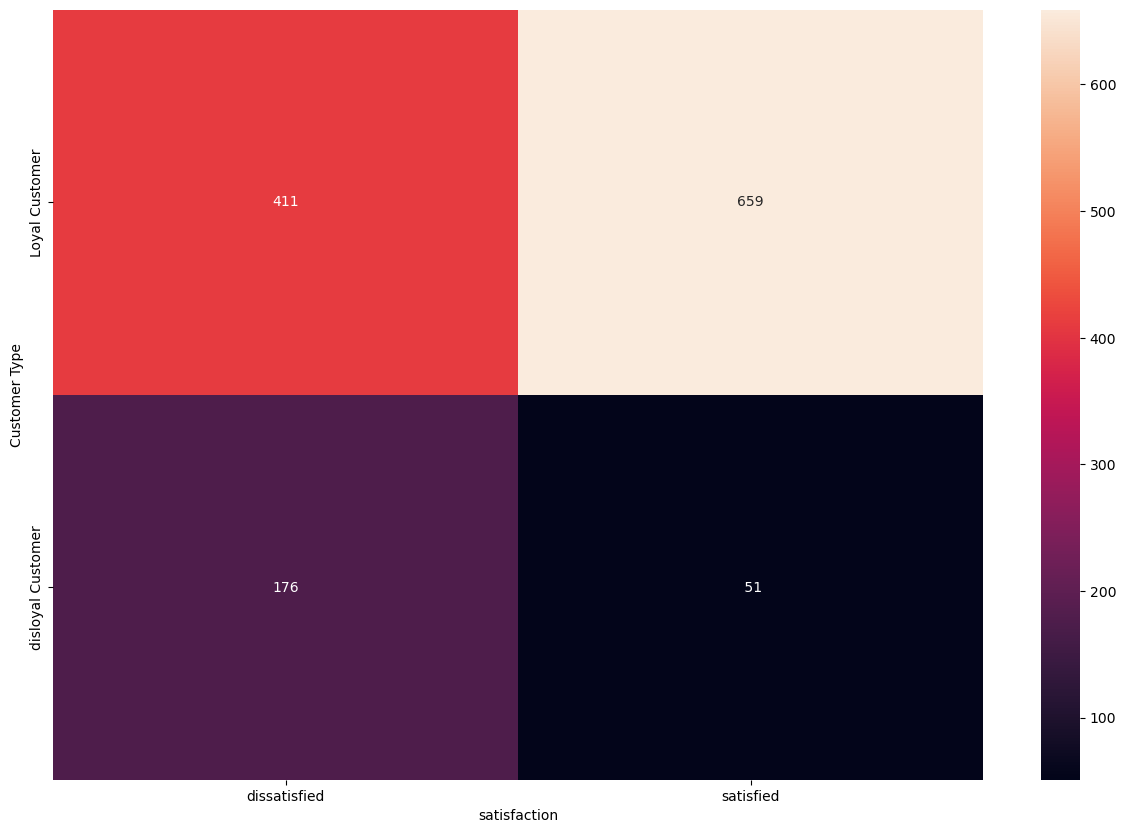

In [22]:
sns.heatmap(pd.crosstab(df_clean['Customer Type'], df_clean['satisfaction']), annot=True, fmt="3")

<Axes: xlabel='satisfaction', ylabel='Type of Travel'>

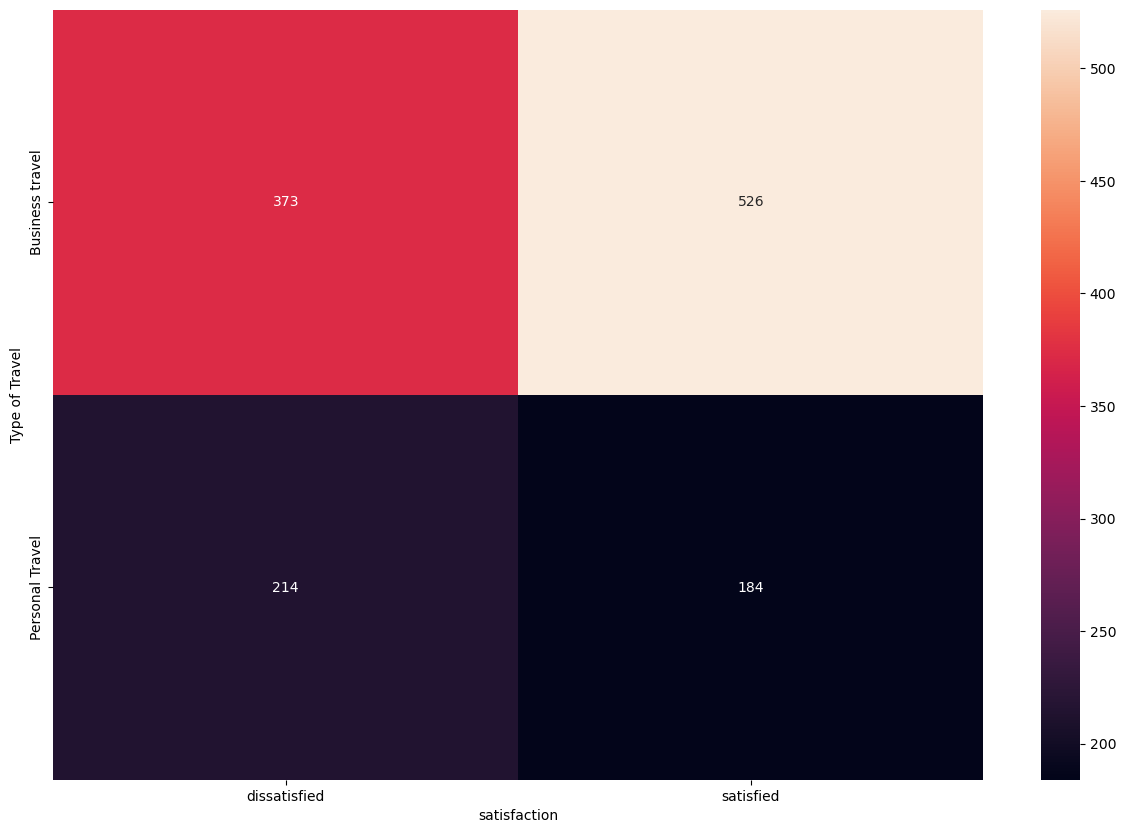

In [23]:
sns.heatmap(pd.crosstab(df_clean['Type of Travel'], df_clean['satisfaction']), annot=True, fmt="3")

<Axes: xlabel='satisfaction', ylabel='Class'>

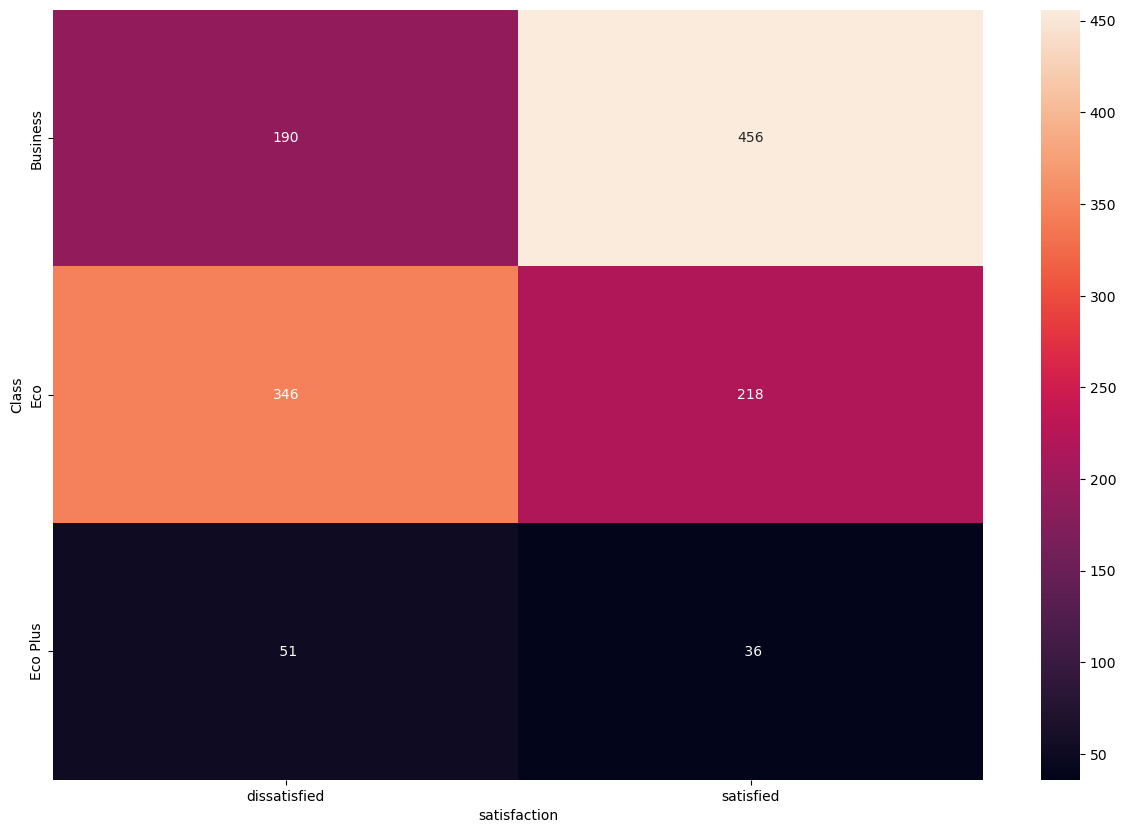

In [24]:
sns.heatmap(pd.crosstab(df_clean['Class'], df_clean['satisfaction']), annot=True, fmt="3")

## **Feature Encoding and Re Ordering**

In [25]:
def encoding(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes 
        df[col] = df[col] + 1
    return df 

obj_cols = df_clean.select_dtypes(include='object').columns 
df_clean = encoding(df_clean, obj_cols)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1297 non-null   int64
 1   satisfaction      1297 non-null   int8 
 2   Customer Type     1297 non-null   int8 
 3   Age               1297 non-null   int64
 4   Type of Travel    1297 non-null   int8 
 5   Class             1297 non-null   int8 
 6   Flight Distance   1297 non-null   int64
 7   Baggage handling  1297 non-null   int64
dtypes: int64(4), int8(4)
memory usage: 45.7 KB


In [26]:
satisfaction = df_clean['satisfaction'].values 
df_clean = df_clean.drop('satisfaction', axis=1)
df_clean['satisfaction'] = satisfaction
df_clean['satisfaction'].unique()

array([1, 2], dtype=int8)

## **Multivariate Analysis**

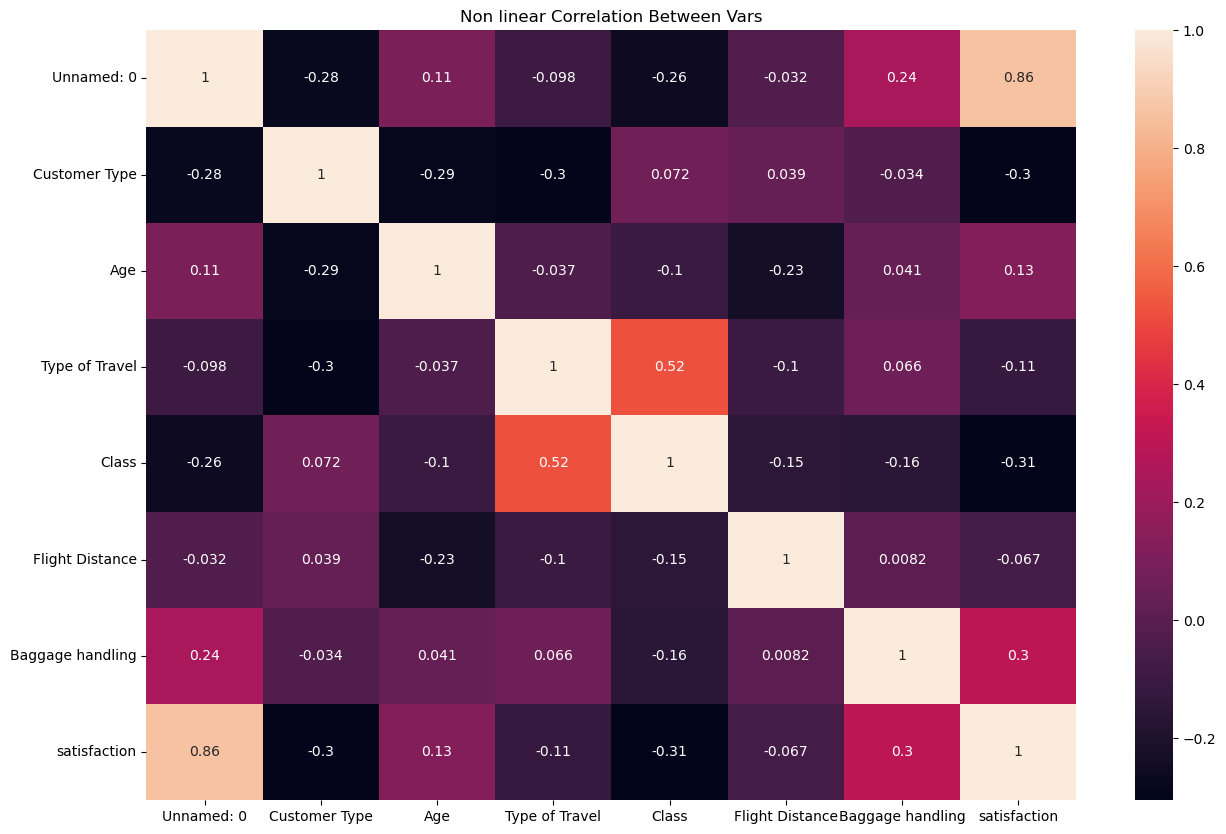

In [27]:
plt.title('Non linear Correlation Between Vars')
sns.heatmap(df_clean.corr(method='spearman'), annot=True)
plt.show()

risk rating has a `perfect` corr with midoverdue, `high` corr with dependents

## **Feature Selection**

In [28]:
bins = int(np.log(len(df_clean)) +1)
print(f'Groups we can seperate based on length: {bins}')

Groups we can seperate based on length: 8


In [29]:
def mutual_information(crosstab):
    observed = np.array(crosstab.iloc[:-1, :-1])
    ratio = observed / np.sum(observed)
    Px = np.sum(ratio, axis=1, keepdims=True)
    Py = np.sum(ratio, axis=0, keepdims=True)
    nonzero = ratio > 0
    MI = np.sum(ratio[nonzero] * np.log(ratio[nonzero] / (Px @ Py)[nonzero]))
    return MI 

for col in df_clean.columns:
    X = np.array(df_clean[col])
    X = np.digitize(X, bins=np.linspace(X.min(), X.max(), bins))
    X = pd.DataFrame(X.T)
    crosstab = pd.crosstab(X[0], df_clean['satisfaction'], margins=True)
    MI = mutual_information(crosstab)
    print(f'{col}: {MI}')

Unnamed: 0: 0.624170617244007
Customer Type: 0.04592996803303161
Age: 0.025176588039616823
Type of Travel: 0.006456208976826614
Class: 0.0513018922461225
Flight Distance: 0.020863438772953043
Baggage handling: 0.054805244042500444
satisfaction: 0.6886436500341007


out of all `baggage handling`, `class` than followed by `customer type` is the most contributor in predicting **satisfaction**

## **Cross Validation**

`midoverdue` has the highest corr with `riskrating` followed be `dependents` possible in best splitting

In [30]:
def accuracy_score(y_test, y_pred):
    return np.mean(y_test == y_pred) * 100

def cross_validation(X, y, model, k=5, prune=False, alpha=0.01):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    accuracies = []

    for i in range(k):
        test_start = i * fold_size
        test_end = test_start + fold_size if i < k -1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train.reshape(-1, 1))
        if prune == 'CCP':
            model.cost_complexity_pruning(alpha, model.root)
        elif prune == 'REP':
            model.reduced_error_pruning(X_test, y_test, model.root)
            
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    data = {
        "X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test, 
        'y_pred': y_pred, 'accuracies': accuracies
    }

    return data 


<div style="background-color:red; color:white; padding:30px; font-size:30px; text-align:center; font-family:'Poppins'"> 
    2 | Modelling (Decision Tree)
</dib>

In [31]:
from collections import Counter

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None, sample=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right 
        self.info_gain = info_gain 
        self.value = value 
        self.sample = sample 

In [32]:
class DecisionsTreeClassifier:
    def __init__(self, max_depth=3, min_sample_split=2, min_sample_leaf=1, features=None, mode='gini'):
        self.max_depth = max_depth
        self.min_sample_split = min_sample_split
        self.min_sample_leaf = min_sample_leaf
        self.features = features
        self.mode = mode 
        
        self.root = None 
        self.feature_importance = None 
        
        
    """RECURSIVE AND BUILDING TREE FUNCTION"""
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]  
        n_samples, n_features = X.shape 
        
        features = np.arange(n_features)
        if self.features != None:
            features = self.features
        
        if n_samples>=self.min_sample_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, n_samples, features)
            
            if best_split['info_gain']>0 and len(best_split['dataset_left'])>=self.min_sample_leaf and len(best_split['dataset_right'])>=self.min_sample_leaf:
                feature_index = best_split['feature_index']
                self.feature_importance[0][feature_index] += best_split['info_gain']
                self.feature_importance[1][feature_index] += 1
                
                left_subtree = self.build_tree(best_split['dataset_left'], curr_depth+1)
                right_subtree = self.build_tree(best_split['dataset_right'], curr_depth+1)
                return Node(
                    feature_index=feature_index,
                    threshold=best_split['threshold'],
                    left=left_subtree,
                    right=right_subtree,
                    info_gain=best_split['info_gain'],
                    sample=Y 
                )
        leaf_value = self.calc_leaf_value(Y)
        return Node(value=leaf_value, sample=Y)
    
    def get_best_split(self, dataset, n_samples, features):
        best_split = {}
        max_info_gain = -float('inf')
        
        for feature_index in features:
            possible_thresholds = np.unique(dataset[:,  feature_index])
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    
                    curr_info_gain = self.information_gain(y, left_y, right_y, self.mode)
                    
                    if curr_info_gain > max_info_gain:
                        best_split = {
                            'feature_index': feature_index,
                            'threshold': threshold,
                            'dataset_left': dataset_left,
                            'dataset_right': dataset_right,
                            'info_gain': curr_info_gain,
                        }
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def calc_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)
    
    
    
    """INFORMATION GAIN"""
    def information_gain(self, parent, l_child, r_child, mode):
        l_weight = len(l_child) / len(parent)
        r_weight = len(r_child) / len(parent)
        if mode == 'gini':
            gain = self.gini(parent) - (l_weight*self.gini(l_child) + r_weight*self.gini(r_child))
        else:
            gain = self.gini(parent) - (l_weight*self.gini(l_child) + r_weight*self.gini(r_child))
        return gain 
    
    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy 
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls ** 2
        return 1 - gini 
    
    
    
    """POST PRUNING FUNC"""
    def reduced_error_pruning(self, X_test, y_test, tree=None):
        if tree.left and tree.right:
            self.reduced_error_pruning(X_test, y_test, tree.left)
            self.reduced_error_pruning(X_test, y_test, tree.right)
            
            if tree.left.value != None and tree.right.value != None:
                accuracy_before = np.mean(self.predict(X_test) == y_test)
                tree.value = self.calc_leaf_value(y_test)
                accuracy_pruned = np.mean(self.predict(X_test) == y_test)
                
                if accuracy_pruned >= accuracy_before:
                    tree.left = None 
                    tree.right = None 
                else:
                    tree.value = None 
                    
    def _get_leaves(self, tree=None):
        if tree.value is not None:
            return [tree]
        return self._get_leaves(tree.left) + self._get_leaves(tree.right)
    
    def _calc_subtree_cost(self, tree=None):
        if tree is None:
            return 0 
        
        if tree.value is not None:
            y = np.array(tree.sample)
            if self.mode == 'gini':
                return self.gini(y)
            else:
                return self.entropy(y)
            
        left_cost = self._calc_subtree_cost(tree.left)
        right_cost = self._calc_subtree_cost(tree.right)
        return left_cost + right_cost + 1
    
    def cost_complexity_pruning(self, alpha=0.1, tree=None):
        if tree is None:
            tree = self.root 
            
        if tree.left and tree.right:
            self.cost_complexity_pruning(alpha, tree.left)
            self.cost_complexity_pruning(alpha, tree.right)
            
            left_cost = self._calc_subtree_cost(tree.left)
            right_cost = self._calc_subtree_cost(tree.right)
            if (left_cost + right_cost - 1) * alpha >= tree.info_gain:
                tree.value = self.calc_leaf_value([leaf.value for leaf in self._get_leaves(tree)])
                tree.left = tree.right = None 
        return tree
    
    
    
    """FIT AND PREDICT"""
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.feature_importance = np.zeros([2, X.shape[1]])
        self.root = self.build_tree(dataset)
        
    def predict(self, X):
        predictions = [self.make_predictions(x, self.root) for x in X]
        return predictions
        
    def make_predictions(self, x, tree=None):
        if tree.value is not None:
            return tree.value 
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_predictions(x, tree.left)
        else:
            return self.make_predictions(x, tree.right)
        
        
        
    """LEAF INFO"""
    def get_leaf_info(self, x, tree=None, node_id=0):
        if tree is None:
            tree = self.root
            
        if tree.value is not None:
            count = dict(Counter(tree.sample))
            ratio = {k: round(v/sum(count)) for k, v in count.items()}
            return [node_id, ratio]
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.get_leaf_info(x, tree.left)
        else:
            return self.get_leaf_info(x, tree.right)
        
    def get_all_leaf_info(self, tree=None, node_id=0, leaf_info=None):
        if leaf_info is None:
            leaf_info = {}
            
        if tree is None:
            tree = self.root 
        
        if tree.value is not None:
            count = dict(Counter(tree.sample))
            ratio = {k: round(v/sum(count)) for k, v in count.items()}
            leaf_info[node_id] = ratio
            return leaf_info
        
        self.get_all_leaf_info(tree.left, node_id * 2 + 1, leaf_info)
        self.get_all_leaf_info(tree.right, node_id * 2 + 2, leaf_info)
        return leaf_info
    
    def print_tree(self, tree=None, depth=0):
        if tree is None:
            tree = self.root 
        
        if tree.value is not None:
            print(f'{"  " * depth} leaf: class {tree.value} | {dict(Counter(tree.sample))} | depth: {depth}')
            return 
        
        print(f'{"  " * depth} feature {tree.feature_index} <= {tree.threshold} | info gain: {tree.info_gain} | depth: {depth}')
        self.print_tree(tree.left, depth+1)
        self.print_tree(tree.right, depth+1)

In [33]:
from collections import deque, Counter
from matplotlib.patches import Patch, ConnectionPatch
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [34]:
class TreeVisualization:
    def __init__(self, tree, data_df, target_col, feature_names):
        self.tree = tree
        self.data_df = data_df
        self.target_col = target_col
        self.feature_names = feature_names
        self.mode = tree.mode
        self.node_cache = {}
        self.palette = self._create_color_palette()
        self._cache_nodes(tree.root)

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            entropy += -p_cls * np.log(p_cls)
        return entropy
    
    def gini(self, y):
        classes = np.unique(y)
        gini = 0
        for cls in classes:
            p_cls = len(y[y==cls]) / len(y)
            gini += p_cls ** 2
        return 1-gini
    
    def _create_color_palette(self):
        classes = np.unique(self.data_df[self.target_col])
        return dict(zip(classes, sns.color_palette("Set2", n_colors=len(classes))))

    def _calculate_impurity(self, y):
        return self.gini(y) if self.mode == 'gini' else self.entropy(y)
    
    def _cache_nodes(self, root):
        queue = deque([root])
        while queue:
            node = queue.popleft()
            self.node_cache[id(node)] = node
            if getattr(node,'left', None):
                queue.extend([node.left, node.right])

    def get_prediction_path(self, x):
        path, decisions = [], []
        node = self.tree.root
        while node.value is None:
            path.append(node)
            feature_val = x[node.feature_index]
            val_str = f"{feature_val:.2f}" if isinstance(feature_val, (int, float)) else str(feature_val)
            thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
            op = "≤" if feature_val <= node.threshold else ">"
            decisions.append(f"Step {len(path)}: {self.feature_names[node.feature_index]} = {val_str} {op} {thresh_str}")
            node = node.left if feature_val <= node.threshold else node.right
        path.append(node)
        decisions.append(f"Final: Class {node.value}")
        return path, decisions
    
    def plot_prediction_path(self, x=None, step=None, fig=None, ax=None):
        fig = fig or plt.figure(figsize=(8,6))
        ax = ax or fig.add_subplot(111)
        ax.clear(); ax.set_axis_off()
    
        node_width, node_height, level_height = 0.15, 0.1, 0.2
        node_boxes, path_ids = {}, {}
    
        def get_node_positions(node, level=0, x_pos=0.5):
            pos = {id(node):(x_pos, 1 - level*level_height)}
            if getattr(node, 'left', None):
                spacing = 0.25/(level+1)
                pos.update(get_node_positions(node.left, level+1, x_pos-spacing))
                pos.update(get_node_positions(node.right, level+1, x_pos+spacing))
            return pos
    
        node_positions = get_node_positions(self.tree.root)
        if x is not None:
            prediction_path, decisions = self.get_prediction_path(x)
            if step is not None:
                prediction_path = prediction_path[:step]
            path_ids = {id(n) for n in prediction_path}
    
        for node_id, (x_pos, y) in node_positions.items():
            node = self.node_cache[node_id]
            node_boxes[node_id] = [x_pos - node_width/2, y - node_height/2, node_width, node_height]
            node_ax = fig.add_axes([x_pos - node_width/2, y - node_height/2, node_width, node_height])
            if node.value is not None:
                self._draw_leaf_node(node_ax, node, node_id in path_ids)
            else:
                self._draw_decision_node(node_ax, node, node_id in path_ids)
    
        self._draw_connections(node_positions, node_boxes, path_ids, ax)
    
        legend_elements = [
            Patch(facecolor=self.palette[cls], alpha=0.3, label=cls)
            for cls in sorted(self.data_df[self.target_col].unique())
        ]
        ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1.2), title="Classes")
    
        if x is not None:
            title = (f"Decision Tree Path - Step {step} of {len(decisions)}"
                     if step is not None else f"Complete Decision Path\nFinal Prediction: Class {self.tree.predict([x])[0]}")
        else:
            title = f"Complete Decision Tree Visualization\nImpurity Measure: {self.mode.capitalize()}"
        fig.suptitle(title, fontsize=10, y=1.2)
        return fig, ax
    def _draw_leaf_node(self, ax, node, is_active):
        ax.axis('off')
        color, width = ('red', 2) if is_active else ('black', 1)
        dist = Counter(node.sample)
        txt = f'Class {node.value}\n' + '\n'.join(f"Class {k}: {v}" for k, v in dist.items())
        txt += f'\n{"Gini" if self.mode=="gini" else "Entropy"}: {self._calculate_impurity(node.sample):.3f}'
        bg_color = self.palette[max(dist, key=dist.get)]
        ax.text(0.5, 0.5, txt, ha='center', va='center', bbox=dict(boxstyle='round', fc=(*bg_color, 0.3), ec=color, linewidth=width), fontsize=8)
    
    def _draw_decision_node(self, ax, node, is_active):
        color, width = ('red', 2) if is_active else ('black', 1)
        sns.histplot(data=self.data_df, x=self.feature_names[node.feature_index],
                     hue=self.target_col, palette=self.palette, multiple='stack', ax=ax)
        ax.set(xlabel='', ylabel='')
        ax.axvline(node.threshold, color=color, linestyle='--', linewidth=width)
        if ax.get_legend(): ax.get_legend().remove()
        dist = Counter(node.sample)
        thresh_str = f"{node.threshold:.2f}" if isinstance(node.threshold, (int, float)) else str(node.threshold)
        title = (f'{self.feature_names[node.feature_index]} <= {thresh_str} \n' +
                 ' '.join(f"Class {k}: {v}" for k, v in dist.items()) +
                 f'\n{"Gini" if self.mode=="gini" else "Entropy"}: {self._calculate_impurity(node.sample):.3f}')
        ax.set_title(title, fontsize=8, color=color )
    
    def _draw_connections(self, positions, boxes, path_ids, main_ax):
        for node_id, _ in positions.items():
            node = self.node_cache[node_id]
            if getattr(node, 'left', None):
                for child in [node.left, node.right]:
                    is_active = node_id in path_ids and id(child) in path_ids
                    self._draw_connection(node, child, boxes, is_active, main_ax)
    
    def _draw_connection(self, parent, child, boxes, is_active, main_ax):
        color, width = ('red', 2) if is_active else ('black', 1)
        p_box, c_box = boxes[id(parent)], boxes[id(child)]
        con = ConnectionPatch(xyA=(p_box[0] + p_box[2]/2, p_box[1]),
                              xyB=(c_box[0] + c_box[2]/2, c_box[1] + c_box[3] ),
                              coordsA='figure fraction', coordsB='figure fraction',
                              axesA=main_ax, axesB=main_ax,
                              arrowstyle="->", color=color, linewidth=width
                              )
        main_ax.add_artist(con)


(<Figure size 800x600 with 6 Axes>, <Axes: >)

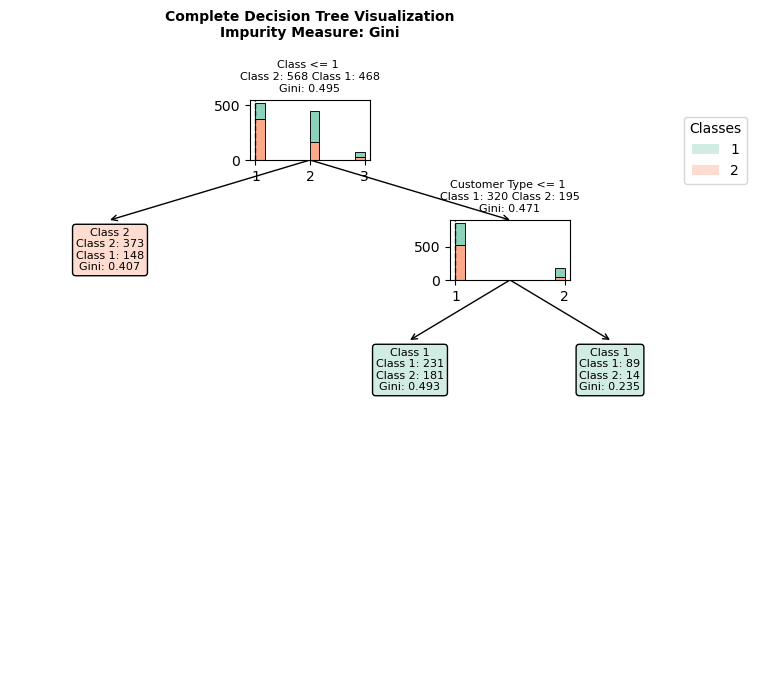

In [35]:
target_col = 'satisfaction'
feature_names = ['Customer Type', 'Class', 'Type of Travel', 'Age', 'Flight Distance','Baggage handling']

X = df_clean[feature_names].values
Y = df_clean[target_col].values

model = DecisionsTreeClassifier(max_depth=float('inf'), min_sample_split=5, min_sample_leaf=3, features=None, mode='gini')
data = cross_validation(X, Y, model, k=5, prune='CCP', alpha=0.01)

data_df = pd.DataFrame(data['X_train'], columns=feature_names)
data_df[target_col] = data['y_train'].flatten()

viz = TreeVisualization(model, data_df, target_col=target_col, feature_names=feature_names)
viz.plot_prediction_path()

## Graphical User Interface

In [36]:
df_clean.columns

Index(['Unnamed: 0', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Baggage handling', 'satisfaction'],
      dtype='object')

In [37]:
df_clean

,Unnamed: 0,Customer Type,Age,Type of Travel,Class,Flight Distance,Baggage handling,satisfaction
0,0,2,8,1,2,2436,3,1
1,1,2,72,1,2,1718,4,1
2,2,1,37,1,1,1931,5,1
3,3,1,26,1,2,3407,4,1
4,4,1,27,1,1,1299,3,1
...,...,...,...,...,...,...,...,...
1292,1292,1,39,2,2,3040,2,2
1293,1293,1,57,1,1,2846,5,2
1294,1294,1,44,1,1,3774,2,2
1295,1295,2,22,1,1,1806,5,2


In [38]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter.ttk import *
from tkinter import messagebox
import matplotlib.pyplot as plt
import seaborn as sns

class TkinterApp:
    def __init__(self, root):
        self.root = root
        self.root.attributes('-fullscree', True)
        self.root.title("Airline Member App")
        self.history = self.load_history()
        self.history_file = 'history.pkl'
        self.columns = ['customer_name','predict_label','predict_detail', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'baggage_handling',  
                         'min_sample_leaf','min_sample_split', 'max_depth','mode', 'post_pruning','alpha_value', 'feature_selected']
        
        Style().configure('TNotebook.Tab', font=('Poppins', 20), padding="30 10 30 10")
        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        self.tab_control = Notebook(root)
        
        self.predict_tab = Frame(self.tab_control, padding="30")
        self.history_tab = Frame(self.tab_control, padding="30")
        self.setting_tab = Frame(self.tab_control, padding="30")

        self.all_features = ['predict_detail', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 'baggage_handling']
        self.selected_features = self.all_features[:3]
        self.initialize_string_var()

        self.tab_control.add(self.predict_tab, text='Predict')
        self.tab_control.add(self.predict_tab, text='History')
        self.tab_control.add(self.predict_tab, text='Setting')
        self.tab_control.pack(fill='x', anchor='w')

        self.train_model()
        self.init_predict_tab()
        self.init_history_tab()
        self.init_setting_tab()
    
    def initialize_strin_var(self):
        self.min_sample_leaf_var = tk.StringVar(value='3')
        self.min_sample_split_var = tk.StringVar(value='1')
        self.max_depth_var = tk.StringVar(value='5')
        self.mode_var = tk.StringVar(value='gini')
        self.post_pruning_var = tk.StringVar(value='REP')
        self.alpha_value_var = tk.StringVar(value='0')
        self.feature_var = tk.StringVar(value=', '.join(self.selected_features))

    def input_label(self, parent, label, type='entry',col=None, row=None, textvariable=None, value=True, desc_text=None ):
        Label(parent, text=label, font=('Poppins', 15)).grid(column=col, row=row, sticky='w')
        if type == 'entry':
            widget = Entry(parent, font=('Poppins', 16), width=23, textvariable=textvariable)
        else:
            widget = Combobox(parent, font=('Poppins', 16), width=20, textvariable=textvariable, value=value)
        widget.grid(column=col, row=row+1, sticky='w')

        if desc_text:
            Label(parent, text=label, font=('Poppins italic', 10)).grid(column=col, row=row+2, sticky='w')

    def init_predict_tab(self):
        Label(self.predict_tab, text="Predict of suit member for Airline", font=('Poppins', 15)).grid(column=0, row=0, sticky='w')
        Label(self.predict_tab, text="Kocak Banget", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')

        self.frame_input = Frame(self.predict_tab)
        self.frame_input.grid(column=1, row=3, sticky='w')
        
        self.features_entries = {}
        self.create_input_fields()

    def create_input_fields(self):
        for widget in self.frame_input.winfo_children():
            widget.destroy()
        
        self.customer_name_entry = self.input_label(self.frame_input, "Customer Name", col=0, row=0, desc_text="Full name of customer")
        
        feature_values = {
            'customer_type': ['Loyal Customer', 'disloyal Customer'],
            'type_of_travel': ['Personal Travel', 'Business travel'],
            'class': ['Eco', 'Business', 'Eco Plus'],
        }
        col = 0
        row = 3
        max_row = row
        for feature in self.selected_features:
            if feature in feature_values:
                self.features_entries[feature] = self.input_label(self.frame_input,value=feature_values[feature], label="Customer Name", type='combobox', col=col, row=row, desc_text=f"Select the type of {feature}")
            else:
                self.features_entries[feature] = self.input_label(self.frame_input,value=feature_values[feature], label="Customer Name", col=col, row=row, desc_text=f"Enter the value of {feature}")
            row+=1
            if col == 4:
                col=0
                row+=3
                max_row = row
        
        Button(self.frame_input, text="Go Predict",command=self.predict_and_plot, padding="30 10 30 10").grid(column=0, row=max_row)
        
        self.frame_result = Frame(self.predict_tab)
        self.frame_result.grid(column=1, row=4, sticky='w')

    def predict_and_plot(self):
        try:
            values = []  
            for feature in self.selected_features:
                try:
                    value = float(self.features_entries[feature].get())
                    values.append(value)
                except:
                    messagebox.showerror("Error", e)

            full_feature_array = np.zeros(len(self.all_features))
            for i, feature in enumerate(self.all_features):
                if feature in self.selected_features:
                    idx = self.selected_features.index(feature)
                    full_feature_array[i] = values[idx]

            self.new_instance = full_feature_array
            path, decisions = self.viz.get_prediction_path(self.new_instance)
            max_step = len(decisions)

            if hasattr(self, 'frame_viz'):
                self.frame_viz = Frame(self.predict_tab)
                self.frame_viz.grid(column=0, row=3, sticky='w')

                self.canvas = FigureCanvasTkAgg(self.fig, self.frame_viz)
                self.canvas.get_tk_widget().grid(column=0, row=1)
            else:
                for widget in self.frame_viz.winfo_children():
                    if widget != self.canvas.get_tk_widget():
                        widget.destroy()

            # make prediction and ratio
            self.step = tk.Scale(self.frame_viz, from_=0, to=max_step, tickinterval=1, resolution=1, lenght=400, command=self.update_plot, )
            self.step.grid(column=0, row=0)

            for widget in self.frame_result.winfo_children():
                widget.destroy()

            ratio = self.model.get_leaf_info(self.new_instance)
            predict = self.model.make_prediction(self.new_instance)

            new_row = {
                'customer_name': [self.customer_name_entry.get()],
                'predict_label': [predict],
                'ratio': [ratio],
                'min_sample_leaf': [ self.min_sample_leaf_var.get()],
                'min_sample_split': [self.min_sample_split_var.get()],
                'max_depth': [self.max_depth_var.get()],
                'mode': [self.mode_var.get()],
                'post_pruning': [self.post_pruning_var.get()],
                'alpha_value': [self.alpha_value_var.get()],
                'feature_selected': [self.feature_var.get()],
            }
            self.input_frame = Frame(self.predict_tab)
            self.input_frame.grid(column=1, row=3, sticky='w')
            
            for i, feature in enumerate(self.all_features):
                new_row[feature] = [full_feature_array[i]]

            col = 0
            row = 3
            for column, value in new_row.items():
                if column in self.selected_features or column in ['customer_name' ,'predict_label' ,'ratio' ,'min_sample_leaf','min_sample_split','max_depth' ,'mode' ,'post_pruning' ,'alpha_value' ,'feature_selected' ]:
                    Label(self.predict_tab, text=column.replace("_", " ").title(), font=('Poppins', 15)).grid(column=col, row=row, sticky='w')
                    Label(self.predict_tab, text=str(value), font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
                    row+=1
                    if col == 4:
                        col=0
                        row+=2
            self.history = pd.concat([self.history, pd.DataFrame(new_row)], ignore_index=True)
            self.update_history()
            self.save_to_pickle()
        except Exception as e:
            messagebox.showerror("Error", e)


    def update_plot(self, value):
        self.fig.clf()
        self.ax = self.fig.add_subplot(111)
        self.viz.plot_prediction_path(x=self.new_instance, step=self.step.get(), fig=self.fig, ax=self.ax)
        self.canvas.draw()

    def init_history_tab(self):
        Label(self.history_tab, text="History", font=('Poppins', 15)).grid(column=0, row=0, sticky='w')
        Label(self.history_tab, text="Compare the performance", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')

        self.history_tree = Treeview(self.history_tab, columns=['customer_name', 'predict_label'])
        self.history_tree.heading('customer_name', text="Customer Name")
        self.history_tree.heading('predict_label', text="Is Satisfied")
        self.history_tree.grid(column=0, row=2, sticky='w')
        Button(self.history_tab, text="Compare",command=self.compare_history, padding="30 10 30 10").grid(column=0, row=3, sticky='e')
        
        self.frame_compare1 = Frame(self.predict_tab)
        self.frame_compare1.grid(column=0, row=4, sticky='w')

        self.frame_compare2 = Frame(self.predict_tab)
        self.frame_compare2.grid(column=1, row=4, sticky='w')
    
    def compare_history(self):
        items_selected = self.history_tree.selection()
        
        if len(items_selected) != 2:
            messagebox.showerror("Error", "Please select exact 2 row for comparation")
            return
        item1 = self.history_tree.loc[self.history_tree.index(items_selected[0])]
        item2 = self.history_tree.loc[self.history_tree.index(items_selected[1])]
        
        for widget in self.frame_compare1.winfo_children():
            widget.destroy()
        for widget in self.frame_compare2.winfo_children():
            widget.destroy()

        col = 0
        row = 3
        for column, value in item1.items():
            if column in self.selected_features or column in ['customer_name' ,'predict_label' ,'ratio' ,'min_sample_leaf','min_sample_split','max_depth' ,'mode' ,'post_pruning' ,'alpha_value' ,'feature_selected' ]:
                Label(self.frame_compare1, text=column.replace("_", " ").title(), font=('Poppins', 15)).grid(column=col, row=row, sticky='w')
                Label(self.frame_compare1, text=str(value), font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
                row+=1
                if col == 4:
                    col=0
                    row+=2

        for column, value in item2.items():
            if column in self.selected_features or column in ['customer_name' ,'predict_label' ,'ratio' ,'min_sample_leaf','min_sample_split','max_depth' ,'mode' ,'post_pruning' ,'alpha_value' ,'feature_selected' ]:
                Label(self.frame_compare2, text=column.replace("_", " ").title(), font=('Poppins', 15)).grid(column=col, row=row, sticky='w')
                Label(self.frame_compare2, text=str(value), font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
                row+=1
                if col == 4:
                    col=0
                    row+=2

    def init_setting_tab(self):
        Label(self.setting_tab, text="Adjust and Setting Model", font=('Poppins', 15)).grid(column=0, row=0, sticky='w')
        Label(self.setting_tab, text="Model setting was set in best performance, update to change it", font=('Poppins', 15)).grid(column=0, row=1, sticky='w')

        frame_input = Frame(self.setting_tab)
        frame_input.grid(column=1, row=3, sticky='w')

        self.min_sample_leaf_entry = self.input_label(frame_input, "Min Sample Leaf", col=0, row=0, desc_text="Full name of customer", textvariable=self.min_sample_leaf_var )
        self.min_sample_split_entry = self.input_label(self.frame_input, "Min Sample Split", col=0, row=1, desc_text="Full name of customer", textvariable=self.min_sample_split_var )
        self.max_depth_entry = self.input_label(self.frame_input, "Max Depth ", col=0, row=2, desc_text="Full name of customer", textvariable=self.max_depth_var )
        
        self.mode_entry = self.input_label(self.frame_input, "Mode Impurity",value=['gini', 'entropy'], col=3, row=0, desc_text="Full name of customer", textvariable=self.mode_var )
        self.post_pruning_entry = self.input_label(self.frame_input, "Post Pruning",value=[False, 'CCP', 'REP'], col=3, row=1, desc_text="Full name of customer", textvariable=self.post_pruning_var )
        self.alpha_value_entry = self.input_label(self.frame_input, "Alpha", col=3, row=2, desc_text="Full name of customer", textvariable=self.alpha_value_var )

        feature_frame = Frame(self.setting_tab)
        feature_frame.grid(column=3, row=2, sticky='w')
        Label(feature_frame, text="Feature Selection", font=('Poppins medium', 16)).grid(column=0, row=0, sticky='w')

        self.feature_listbox = tk.Listbox(feature_frame, selectmode='multiple',height=len(self.all_features),font=('Poppins', 18), width=20 )
        self.feature_listbox.grid(column=0, row=1, sticky='w')

        for i, feature in enumerate(self.all_features):
            self.feature_listbox.insert('end', feature)
            if feature in self.selected_features:
                self.feature_listbox.selection_set(i)

        Label(feature_frame, text="Current Feature:", font=('Poppins medium', 10)).grid(column=0, row=2, sticky='w')
        Label(feature_frame, textvariable=self.feature_var, font=('Poppins light', 10), wraplength=400).grid(column=0, row=3, sticky='w')
        
        Button(frame_input, text="Compare",command=self.train_model, padding="30 10 30 10").grid(column=0, row=6, sticky='e')

    def update_model_and_features(self):
        selected_indiceis = self.feature_listbox.curselection()

        if selected_indiceis:
            messagebox.showerror("Error", "Please select exact 2 row for comparation")
            return
        
        self.selected_features = [self.selected_features[i] for i in selected_indiceis]
        self.feature_var.set(', '.join(self.selected_features))
        self.create_input_fields()
        self.train_model()

    def train_model(self):
        try:
            self.frame_viz = Frame(self.setting_tab)
            self.frame_viz.grid(column=0, row=3, sticky='w')

            feature_indices = list(range(len(self.selected_features)))
            self.model = DecisionsTreeClassifier(max_depth=int(self.max_depth_var.get()),
                                                 min_sample_leaf=int(self.min_sample_leaf_var.get()),
                                                 min_sample_split=int(self.min_sample_split_var.get()),
                                                 mode=self.mode_var.get(),
                                                 features=feature_indices)
            
            X_selected = df_clean[self.selected_features].values
            Y = df_clean['satisfaction'].flatten()
            data = cross_validation(X_selected, Y, self.model, k=5, prune=self.post_pruning_var.get(), alpha=self.alpha_value_var.get())

            data_df = pd.DataFrame(data['X_train'], columns=self.selected_features)
            data_df['satisfaction'] = data['y_train']

            self.viz = TreeVisualization(self.model, data_df, feature_names==self.selected_features, target_col='satisfaction')
            self.fig.clf()
            self.fig.add_subplot(111)
            self.update_plot()

            self.clf_report_frame = Frame(self.setting_tab)
            self.clf_report_frame.grid(column=0, row=6, sticky='w')

            for widget in self.clf_report_frame.winfo_children():
                widget.destroy()
            
            clf_report = classification_report(data['y_train'], data['y_test'])

            col = 0
            row = 1
            for column, value in clf_report.items():
                Label(self.clf_report_frame, text=column.replace("_", " ").title(), font=('Poppins', 15)).grid(column=col, row=row, sticky='w')
                Label(self.clf_report_frame, text=str(value), font=('Poppins', 15)).grid(column=col, row=row+1, sticky='w')
                row+=1
                if col == 4:
                    col=0
                    row+=2

            messagebox.showinfo('Success', f"Model successfully updated")

        except Exception as e:
            messagebox.showerror('Error', f"Error: {e}")

if __name__ == "__main__":
    root = tk.Tk()
    app = TkinterApp(root)
    root.mainloop()

AttributeError: 'TkinterApp' object has no attribute 'load_history'

In [ ]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)